In [44]:
import jieba.analyse
import numpy as np

word_list = ["罪","毒品","毒品販運","詐欺","走私","稅務犯罪","組織犯罪","證券犯罪","貪污賄賂","第三方洗錢","毒","詐財",
             "詐騙","稅","證券","貪污","賄賂","洗錢","販運","稅務","黑錢","仿冒","盜版","侵害","侵害營業秘密","營業秘密",
             "非法","武器","非法販運武器","販運武器","贓物","贓款","黑市","竊盜","綁架","拘禁","妨害自由","犯罪","偽造文書"]
word_list_len = len(word_list)

f = open('蘋果日報.txt', 'r', encoding = 'utf8')
doc_list = f.read().split(",")
doc_list_len = len(doc_list)

#建立文件對關鍵字的矩陣
doc_word_matrix = np.zeros((doc_list_len, word_list_len), int)

#建立共現矩陣
co_occur_matrix = np.zeros((word_list_len, word_list_len), int)

In [45]:
#紀錄matrix
for idx,word in enumerate(word_list):
    print("word:" + word)
    for idy,doc in enumerate(doc_list):
        #print("doc:" + str(idy))
        seg_list = jieba.cut(doc) #斷詞後為generator
        seg_str = ",".join(seg_list) #接成字串
        seg_str_list = seg_str.split(",") #string用","切開存成list
        for idz,seg in enumerate(seg_str_list):
            if word == seg:
                #print("doc" + str(idy+1) + "的第" + str(idz) + "個字：" + seg + " == word:" + word)
                doc_word_matrix[idy][idx] = 1

word:罪
word:毒品
word:毒品販運
word:詐欺
word:走私
word:稅務犯罪
word:組織犯罪
word:證券犯罪
word:貪污賄賂
word:第三方洗錢
word:毒
word:詐財
word:詐騙
word:稅
word:證券
word:貪污
word:賄賂
word:洗錢
word:販運
word:稅務
word:黑錢
word:仿冒
word:盜版
word:侵害
word:侵害營業秘密
word:營業秘密
word:非法
word:武器
word:非法販運武器
word:販運武器
word:贓物
word:贓款
word:黑市
word:竊盜
word:綁架
word:拘禁
word:妨害自由
word:犯罪
word:偽造文書


In [46]:
print(doc_word_matrix)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


In [47]:
for idx1,word in enumerate(word_list): #左到右跑每一個word
    for idx2,word_2_compare in enumerate(word_list): #跑要比較的word
        for idy,doc in enumerate(doc_list): #跑每一份文件
            if idx1 != idx2:
                if doc_word_matrix[idy][idx1] ==1 and doc_word_matrix[idy][idx2]==1: #word和word2compare在doc[idy]同時出現
                    co_occur_matrix[idx1][idx2] += 1
                    #co_occur_matrix[idx2][idx1] += 1

In [48]:
print(co_occur_matrix)

[[0 0 0 ... 0 5 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [5 6 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
co_occur_matrix.tofile('matrix.txt', ' ')

In [52]:
#Turn into dataframe
import pandas as pd
Eng_wordlist=['crime','drug','Drug_trafficking','Fraud','smuggling','Tax_crime','Organized_crime','Securities_crime',
    'Corruption_and_bribery','Third_party_money_laundering','poison','Fraud_2','Fraud_3','tax',
    'Securities','corruption','bribe','Money_laundering','Trafficking','Tax','Black_money',
    'Counterfeiting','Pirate','Violation','Infringement_of_business_secrets','Business_secret',
    'illegal','arms','Illegal_trafficking_of_weapons','Trafficking_weapons','swag','Loan',
    'black_market','Thief','Kidnapping','Detention','Impede_freedom','Commiting_crime','Forged_instrument']

translation=[word_list,Eng_wordlist]
trans=pd.DataFrame(translation, index = ['中文罪名' , '英文翻譯'])
print(trans)

df=pd.DataFrame(co_occur_matrix,columns = Eng_wordlist, index=Eng_wordlist)
df.to_csv('Result.csv')
print(df)

         0     1                 2      3          4          5   \
中文罪名      罪    毒品              毒品販運     詐欺         走私       稅務犯罪   
英文翻譯  crime  drug  Drug_trafficking  Fraud  smuggling  Tax_crime   

                   6                 7                       8   \
中文罪名             組織犯罪              證券犯罪                    貪污賄賂   
英文翻譯  Organized_crime  Securities_crime  Corruption_and_bribery   

                                9   ...                   29    30    31  \
中文罪名                         第三方洗錢  ...                 販運武器    贓物    贓款   
英文翻譯  Third_party_money_laundering  ...  Trafficking_weapons  swag  Loan   

                32     33          34         35              36  \
中文罪名            黑市     竊盜          綁架         拘禁            妨害自由   
英文翻譯  black_market  Thief  Kidnapping  Detention  Impede_freedom   

                   37                 38  
中文罪名               犯罪               偽造文書  
英文翻譯  Commiting_crime  Forged_instrument  

[2 rows x 39 columns]
       

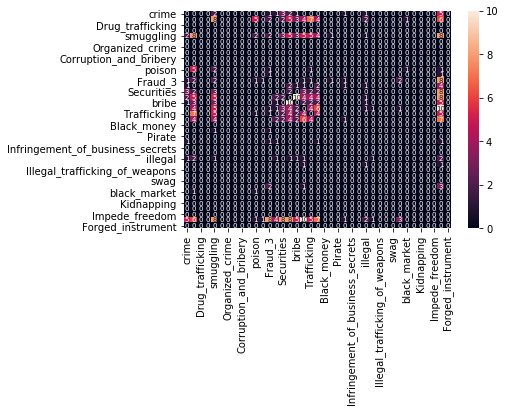

In [53]:
import seaborn as sn
import numpy as np
sn.heatmap(df,annot=True,annot_kws={'size':7})